In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_csv('data/Social_Network_Ads.csv')


data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
X = data.iloc[:, [1,2, 3]].values
y = data.iloc[:, -1].values

le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy : 0.925
Confussion : [[56  2]
 [ 4 18]]


Text(77.92222222222227, 0.5, 'Predicted')

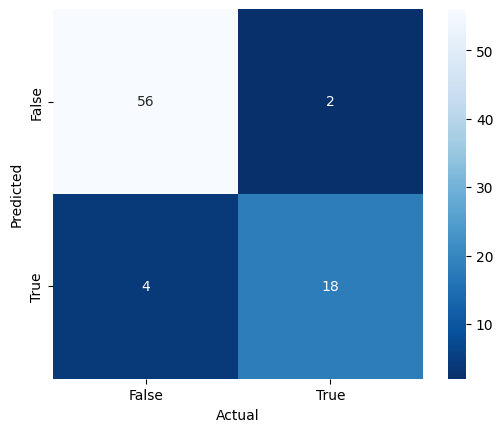

In [28]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy :",accuracy)
print("Confussion :",confusion)


sns.heatmap(confusion, annot=True, fmt='d', square=True, cmap='Blues_r', xticklabels=[False, True], yticklabels=[False, True])

plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Accuracy Score')

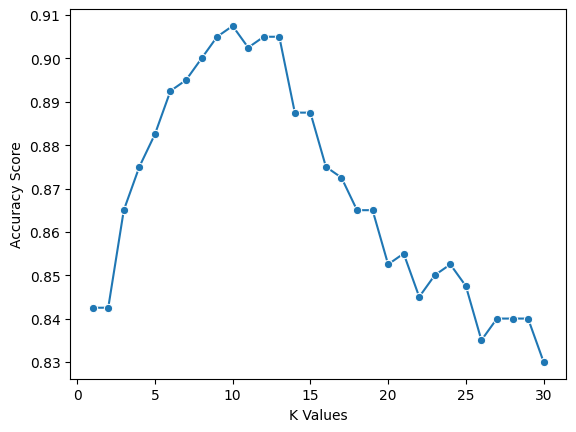

In [27]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [31]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred_2 = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_2)

print("Accuracy :",knn_accuracy)
print(best_k)

Accuracy : 0.95
10
